# <font color="blue">Projeto de Clustering</font>

![bunner](./Bunner_v1.svg)

## Objetivo

Criar um sistema de recomendação utilizando o algoritmo *não-supervisionado* KMeans do `Scikit-learn`.<br>
Neste projeto será utilizado uma base de dados com músicas do serviço de *streaming* de áudio **Spotify**.

## Spotify

É um serviço de *streaming* de áudio, disponível em praticamente todas as plataformas e está presente no mundo todo. Foi lançado oficialmente em 2008, na Suécia. Possui acordos com a *Universal Music*, *Sony BGM*, *EMI Music* e *Warner Music Group*.

O usuário pode encontrar playlists e rádios, checar quais músicas estão fazendo sucesso entre os assinantes, criar coleções ou seguir as coleções de amigos e artistas. A plataforma conta com mais de 170 milhões de usuários e veio para o Brasil em 2014.

## Importando as bibliotecas

In [1]:
# para identificar os arquivos em uma pasta
import glob

# para manipulação dos dados
import pandas as pd
import numpy as np

# para visualizações
import seaborn as sns
import matplotlib.pyplot as plt

# para pré-processamento
from sklearn.preprocessing import MinMaxScaler

# para machine learning do agrupamento
from sklearn.cluster import KMeans

# para ignorar eventuais warnings
import warnings
warnings.filterwarnings("ignore")

# algumas configurações do notebook
%matplotlib inline
pd.options.display.max_columns = None
plt.style.use('ggplot')

## importando a base de dados

Vamos importar nossa base de dados, utilizando o método *glob* do framework de mesmo nome para buscar os arquivos *".csv"* que contem na pasta, no nosso caso temos 2 arquivos referentes aos anos de 2018 e 2019. Em seguida utilizaremos um *list comprehension* para fazer a leitura dos dados com o método do pandas, com isso podemos já inserir dentro de uma lista vazia criada, concatenando esses dois elementos da lista, pelas linhas, formando um arquivo único e por fim, visualizamos o resultado com as primeiras 5 linhas com o método *head()*.

Temos 20 colunas ou *features* em nosso conjunto, vamos conhecer cada uma delas com o nosso **Dicionário de dados**:

- **name:** nome da faixa
- **album:** album que contém a faixa
- **artist:** nome do artista
- **release_date:** ano de lançamento da faixa
- **length:** tempo de duração da música
- **popularity:** quanto mais alto o valor, maior a popularidade
- **track_id:** ID
- **mode:** Modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado
- **acousticness:** quanto mais alto o valor, mais acústico é a música
- **danceability:** quanto mais alto o valor, mais dançante é a música com base nos elementos musicais
- **energy:** A energia da música, quanto mais alto o valor, mais enérgica é
- **instrumentalness:** o valor de nível instrumental, se mais cantada ou sem vocal
- **liveness:** presença de audiência, é a probabilidade da música ter tido público ou não
- **valence:** quanto maior o valor, mais positiva (feliz, alegre, eufórico) a música é
- **loudness:** quanto maior o valor, mais alto é a música
- **speechiness:** quanto mais alto o valor, mais palavras cantadas a música possui
- **tempo:** o tempo estimado em BPM (batida por minuto), relaciona com o ritmo derivando a duração média do tempo
- **duration_ms:** a duração da faixa em milisegundos
- **time_signature:** Uma estimativa de fórmula de compasso geral de uma faixa
- **genre:** Genero do artista

In [2]:
# identificando os arquivos .csv contidos na pasta
all_files = glob.glob("dados/*.csv")

# criando uma lista vazia para receber os dois arquivos
df_list = []

# fazendo um loop e armazenando os arquivos na pasta df_list
[df_list.append(pd.read_csv(filename, parse_dates = ['release_date'])) for filename in all_files]

# concatenando os dois arquivos para formar um
df = pd.concat(df_list, axis=0, ignore_index=True).drop('Unnamed: 0', axis=1)

# visualizando as primeiras 5 linhas
df.head()

,name,album,artist,release_date,length,popularity,track_id,mode,acousticness,danceability,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,duration_ms,time_signature,genre
0,goosebumps,Birds In The Trap Sing McKnight,Travis Scott,2016-09-16,243836,89,6gBFPUFcJLzWGx4lenP6h2,1,0.0847,0.841,0.728,0.000000,0.1490,0.430,-3.370,0.0484,130.049,243837,4,['rap']
1,Trevo (Tu),ANAVITÓRIA,ANAVITÓRIA,2016-08-18,205467,69,2vRBYKWOyHtFMtiK60qRz7,1,0.8770,0.676,0.374,0.000132,0.1650,0.200,-8.201,0.0266,99.825,205468,4,"['folk brasileiro', 'nova mpb', 'pop lgbtq+ br..."
2,Hear Me Now,Hear Me Now,Alok,2016-10-21,194840,73,39cmB3ZoTOLwOTq7tMNqKa,1,0.5460,0.778,0.463,0.002890,0.0731,0.496,-7.603,0.0389,121.999,194840,4,"['brazilian edm', 'edm', 'electro house', 'pop..."
3,Refém,O Cara Certo,Dilsinho,2016-06-10,223546,67,4muZ1PUxmss4cVmYnpLrvs,1,0.6920,0.648,0.542,0.000000,0.0923,0.835,-6.292,0.0360,147.861,223547,4,"['pagode', 'pagode novo']"
4,Ela Só Quer Paz,Ela Só Quer Paz,Projota,2016-01-27,174382,66,1RPrzKZdkzCNV0Ux0xEHg2,0,0.0207,0.655,0.664,0.000000,0.0771,0.934,-4.506,0.1790,172.005,174382,4,"['brazilian edm', 'brazilian hip hop', 'pop na..."


Como extraimos também os *IDs* das músicas, que é a parte final da url, única para cada música, vamos juntar e formar a url completa.

In [3]:
# definindo a url padrão
url_standard = 'https://open.spotify.com/track/'

# unindo com os IDs de cada música
df['url'] = url_standard + df['track_id']

# removendo a coluna dos IDs
df.drop(['track_id'], axis=1, inplace=True)

# visualizando as primeiras duas linhas
df.head(2)

,name,album,artist,release_date,length,popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,duration_ms,time_signature,genre,url
0,goosebumps,Birds In The Trap Sing McKnight,Travis Scott,2016-09-16,243836,89,1,0.0847,0.841,0.728,0.000000,0.149,0.43,-3.370,0.0484,130.049,243837,4,['rap'],https://open.spotify.com/track/6gBFPUFcJLzWGx4...
1,Trevo (Tu),ANAVITÓRIA,ANAVITÓRIA,2016-08-18,205467,69,1,0.8770,0.676,0.374,0.000132,0.165,0.20,-8.201,0.0266,99.825,205468,4,"['folk brasileiro', 'nova mpb', 'pop lgbtq+ br...",https://open.spotify.com/track/2vRBYKWOyHtFMti...


Assim como as primeiras 5 linhas, vamos também visualizar as 5 últimas, com o método *tail()*

In [4]:
# visualizando as últimas 5 linhas
df.tail()

,name,album,artist,release_date,length,popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,duration_ms,time_signature,genre,url
7995,Phases,Phases,PRETTYMUCH,2019-04-26,215759,76,0,0.1690,0.770,0.636,0.0,0.0676,0.492,-6.724,0.1310,105.930,215760,4,"['boy band', 'dance pop', 'pop', 'post-teen po...",https://open.spotify.com/track/3je88Q4OvTqIx7B...
7996,Vizinho Chato - Ao Vivo,Pé na Areia (Ao Vivo),Gustavo Mioto,2019-03-22,161333,48,0,0.2640,0.618,0.705,0.0,0.3960,0.607,-2.676,0.0581,111.765,161333,4,"['sertanejo', 'sertanejo pop', 'sertanejo univ...",https://open.spotify.com/track/6GGPR1U5uN31XtX...
7997,Bacc Seat (feat. Ty Dolla $ign),Please Excuse Me For Being Antisocial,Roddy Ricch,2019-12-06,172320,73,1,0.0404,0.783,0.524,0.0,0.0870,0.153,-6.828,0.1150,144.989,172320,4,"['north carolina hip hop', 'rap']",https://open.spotify.com/track/6In6SkveIw26thd...
7998,Missão - Ao vivo,Chão de estrelas (Ao vivo),Ferrugem,2019-07-19,179038,48,0,0.5480,0.493,0.785,0.0,0.4840,0.732,-5.818,0.0610,155.994,179039,4,['pagode'],https://open.spotify.com/track/2v63tyymGKLvpdI...
7999,Dream Glow (BTS World Original Soundtrack) - P...,Dream Glow (BTS World Original Soundtrack) [Pt...,BTS,2019-06-07,187457,68,0,0.0967,0.735,0.740,0.0,0.1010,0.541,-3.837,0.0519,141.948,187458,4,"['k-pop', 'k-pop boy group']",https://open.spotify.com/track/4c1WgUnHXq2LEnc...


Quais são as dimensões desse conjunto? O método `shape` pode nos ajudar a descobrir.

In [5]:
print(f"Quantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}")

Quantidade de linhas: 8000
Quantidade de colunas: 20


## Análise Exploratória dos dados

Dados faltantes ou nulos, é uma característica normal para um conjunto de dados extraido no mundo real. Vamos dar uma olhada se esse conjunto possui algum.

In [6]:
# checando dados nulos
df.isnull().sum()

name                0
album               0
artist              0
release_date        0
length              0
popularity          0
mode                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
duration_ms         0
time_signature      0
genre               0
url                 0
dtype: int64

Puxando os dados diretamente desta API, notamos que não foram trazidos nenhum dado faltante.

Podemos notar que a maioria são dados numéricos, mas será que realmente estão nesse formato, vamos fazer um *check* utilizando o método *dtypes.

In [7]:
# checando os tipos de dados
df.dtypes

name                        object
album                       object
artist                      object
release_date        datetime64[ns]
length                       int64
popularity                   int64
mode                         int64
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
valence                    float64
loudness                   float64
speechiness                float64
tempo                      float64
duration_ms                  int64
time_signature               int64
genre                       object
url                         object
dtype: object

Podemos ver que os formatos estão de acordo com o que deveriam ser.

Vamos agora checar se há dados, ou melhor, linhas iguais ou duplicadas com o método *duplicated()*, caso encontramos vamos remover com o método *drop_duplicates* e checar as novas dimensões.

In [8]:
# checando dados duplicados
df.duplicated().sum()

0

In [9]:
# removendo linhas duplicadas
df.drop_duplicates(inplace=True)

df = df.reset_index()

In [10]:
# checando as novas dimensões
df.shape

(8000, 21)

In [11]:
# garantindo que não há mais dados duplicados
df.duplicated().sum()

0

Vamos dar uma olhada em algumas estatísticas, para conhecermos mais nossos dados, e pra isso fazemos uso do método *describe()*.

In [12]:
# analisando estatísticas descritivas (numéricas)
df.describe()

,index,length,popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,duration_ms,time_signature
count,8000.00000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000
mean,3999.50000,2.125530e+05,57.335875,0.615625,0.352589,0.624380,0.634561,0.055460,0.270518,0.508747,-7.441924,0.098780,122.234154,2.125534e+05,3.941875
std,2309.54541,7.170669e+04,11.412421,0.486478,0.283883,0.172115,0.211528,0.204293,0.254686,0.250479,4.996436,0.099974,29.378527,7.170670e+04,0.398455
min,0.00000,3.305600e+04,38.000000,0.000000,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,-42.825000,0.000000,0.000000,3.305600e+04,0.000000
25%,1999.75000,1.737755e+05,48.000000,0.000000,0.096500,0.528000,0.499000,0.000000,0.101000,0.318000,-8.389250,0.038800,98.988250,1.737762e+05,4.000000
50%,3999.50000,2.016580e+05,56.000000,1.000000,0.297000,0.647000,0.664000,0.000000,0.143000,0.516000,-6.323000,0.057400,123.829000,2.016585e+05,4.000000
75%,5999.25000,2.347822e+05,66.000000,1.000000,0.579000,0.743000,0.800000,0.000067,0.352000,0.706000,-4.717750,0.112000,140.036000,2.347822e+05,4.000000
max,7999.00000,1.147406e+06,95.000000,1.000000,0.996000,0.979000,1.000000,1.000000,1.000000,0.980000,0.710000,0.841000,211.974000,1.147406e+06,5.000000


Como argumentos padrões do próprio método, foram retornadas somente das variáveis numéricas, mas também podemos fazer isso para as variáveis categóricas passando o tipo como argumento.

In [13]:
# analisando estatísticas descritivas (categóricas)
df.describe(include='O')

,name,album,artist,genre,url
count,8000,8000,8000,8000,8000
unique,7460,4715,2062,1147,8000
top,Alone,Barulho de Chuva para Dormir (Com Trovões),Various Artists,[],https://open.spotify.com/track/0OGw7V8wAI6OsZI...
freq,5,40,196,292,1


Olhando somente para os números não são muito intuitivos, vamos então analisar graficamente, utilizado a biblioteca **seaborn**.<br>
Primeiro, vamos criar um dataframe filtrando somente as variáveis de tipo numéricas, depois criaremos um loop para plotar os dados.

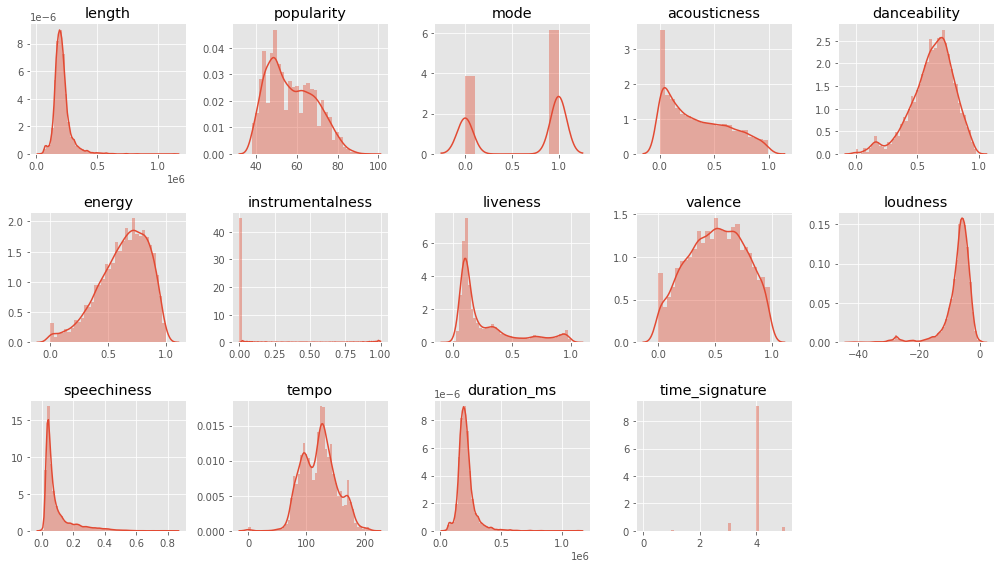

In [14]:
# separando o conjunto de dados em tipos numéricos
df_num = df.select_dtypes(['float64', 'int64'])

# definindo a área de plotagem
plt.figure(figsize=(14,8))

# plotando os gráficos
for i in range(1, len(df_num.columns)):
    ax = plt.subplot(3, 5, i)
    sns.distplot(df_num[df_num.columns[i]])
    ax.set_title(f'{df_num.columns[i]}')
    ax.set_xlabel('')

# otimizando o espaçamento entre os gráficos
plt.tight_layout()

Podemos notar vários tipos de distribuição entre as variáveis e escalas diferentes. A princípio fizemos isso mais para saber como são as distribuições, não vamos analisar nada muito a fundo nesse momento.

Vamos analisar também a correção entre essas variáveis, utilizando um `heatmap`.

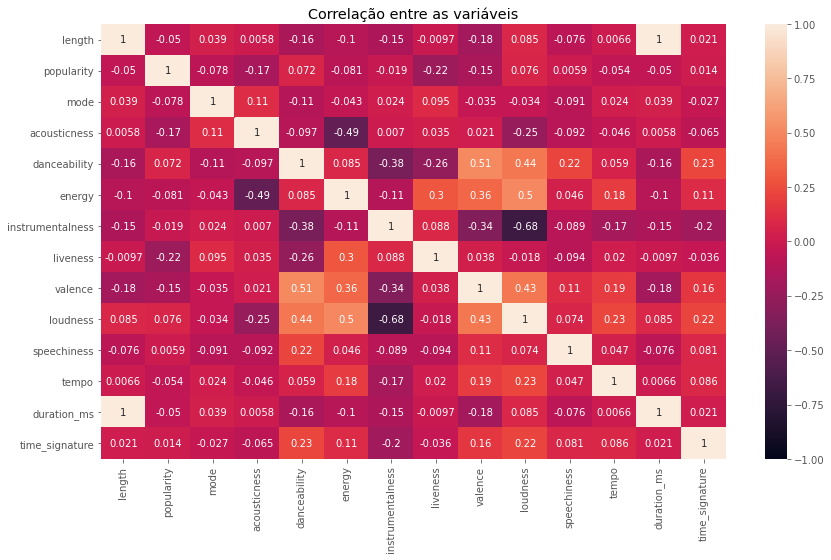

In [15]:
# definindo a área de plotagem
plt.figure(figsize=(14,8))

# plotando o gráfico
sns.heatmap(df_num.iloc[:, 1:].corr(), vmin=-1, vmax=1, annot=True).set_title('Correlação entre as variáveis');

Analisando as correlações, podemos notar que algumas variáveis se correlacionam fortemente, então não há problema em remover pelo menos uma delas, dependendo o caso o modelo pode ficar enviesado, vou optar em remover pelo menos uma, de cada duas correlactionadas fortemente.

In [16]:
df_num.drop(['length', 'loudness'], axis=1, inplace=True)

## Pré-processamento dos dados

Para o pré-processamento dos dados, vamos utilizar o `MinMaxScaler` do **scikit-learn**. Vamos *normalizar* porque como vimos acima, nas distribuições dos dados, as escalas são muito diferentes o framework é sensível à isso, se não fizermos isso poderá dar um resultado bem diferente do esperado.

O formato das distribuições continuarão as mesmas, porém estarão na mesma escala.

In [17]:
# instanciando o tranformador
scaler = MinMaxScaler()

# treinando e transformando os dados
scaled = scaler.fit_transform(df_num)

# colocando os dados transformados em um dataframe
df_scaled = pd.DataFrame(scaled, columns=df_num.columns)

# olhando o resultado
df_scaled.head()

,index,popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,valence,speechiness,tempo,duration_ms,time_signature
0,0.000000,0.894737,1.0,0.085040,0.859040,0.727995,0.000000,0.1490,0.438776,0.057551,0.613514,0.189152,0.8
1,0.000125,0.543860,1.0,0.880522,0.690501,0.373988,0.000132,0.1650,0.204082,0.031629,0.470930,0.154720,0.8
2,0.000250,0.614035,1.0,0.548193,0.794688,0.462989,0.002890,0.0731,0.506122,0.046254,0.575538,0.145182,0.8
3,0.000375,0.508772,1.0,0.694779,0.661900,0.541991,0.000000,0.0923,0.852041,0.042806,0.697543,0.170944,0.8
4,0.000500,0.491228,0.0,0.020783,0.669050,0.663993,0.000000,0.0771,0.953061,0.212842,0.811444,0.126824,0.8


Vamos confirmar o que foi dito, sobre as distribuições e escalas.

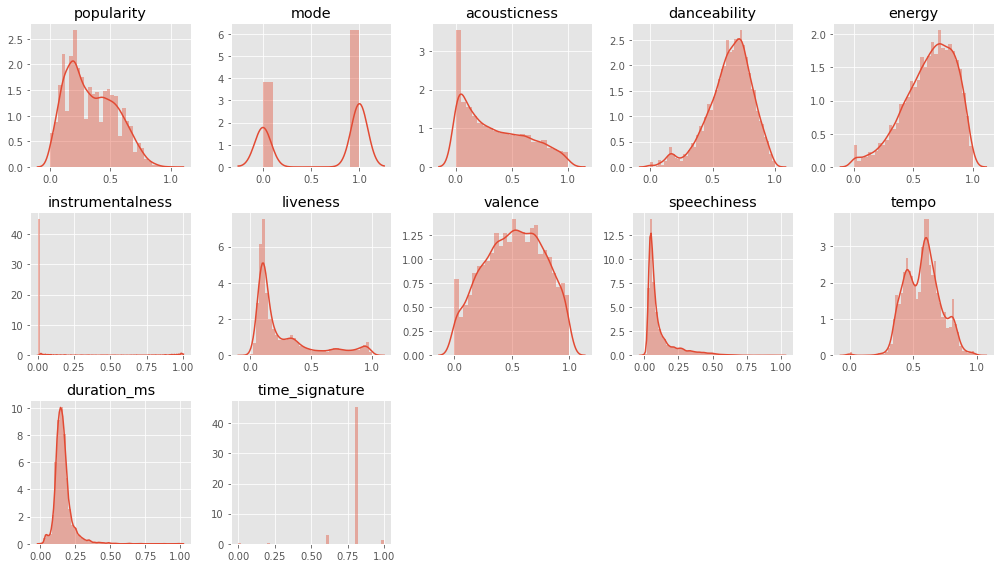

In [18]:
# definindo a área de plotagem
plt.figure(figsize=(14,8))

# plotando os gráficos
for i in range(1, len(df_scaled.columns)):
    ax = plt.subplot(3, 5, i)
    sns.distplot(df_scaled[df_scaled.columns[i]])
    ax.set_title(f'{df_scaled.columns[i]}')
    ax.set_xlabel('')

# otimizando o espaçamento entre os gráficos
plt.tight_layout()

Todas as escalas estão de 0 à 1.

## Machine Learning

Agora vamos partir para o aprendizado do modelo, antes um breve introdução do algoritmo que será usado e como é seu funcionamento.

### Clustering

**Clustering** é o conjunto de técnicas para análise de agrupamento de dados, que visa fazer agrupamentos automáticos de dados segundo o grau de semelhança. O algoritmo que vamos utilizar é o **K-Means**.

#### K-Means

Como funciona o algoritmo K-Means?<br>
O K-Means agrupa os dados tentando separar as amostras em grupos de variancias iguais, minimizando um criterio conhecido como *inertia* ou *wcss (within-cluster sum-of-squares)*, em português, soma dos quadrados dentro do cluster, ou seja, minimizar essa soma dentro do cluster, quanto menor, melhor o agrupamento.

Como definir a quantidade de grupos?<br>
Uma técnica à se usar é a do **cotovelo**, com base na *inertia* ou *wcss*, onde definimos, basicamente, quando a diferença da *inertia* parar de ser significativa. Esse método compara a distância média de cada ponto até o centro do cluster para diferentes números de cluster.

Além do método do cotovelo, para identificar o melhor número de clusters para nossos dados, podemos também utilizar inspeção visual, conhecimento prévio dos dados e do negócio e as vezes já temos até um número pré-definido, dependendo do objetivo.

Exemplo de como funciona a técnica do cotovelo.
![gif](https://media4.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif?cid=ecf05e47hc3yaesy4tj8jvryl8n23vp2twn1s77nta0dokqj&rid=giphy.gif)

Vamos começar!

In [19]:
# criando uma lista vazia para inertia
wcss_sc = []

# criando o loop
for i in range(1, 50):
    
    # instanciando o modelo
    kmeans = KMeans(n_clusters=i, random_state=42)
    
    # treinando o modelo
    kmeans.fit(df_scaled.iloc[:, 1:])
    
    # salvando os resultados
    wcss_sc.append(kmeans.inertia_)

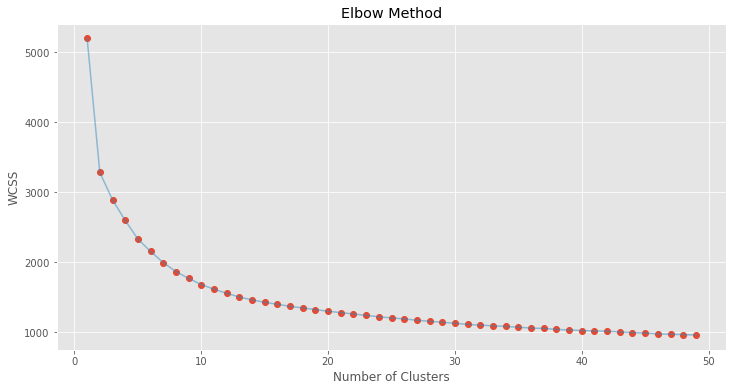

In [20]:
# plotando o Elbow Method
plt.figure(figsize=(12,6))
plt.plot(range(1, 50), wcss_sc, 'o')
plt.plot(range(1, 50) , wcss_sc , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
# plt.savefig('Elbow_Method.png')
plt.show()

Vamos fazer um teste com 20 grupos, pois podemos notar que a diferença não será mais muito significativa a partir desse valor. Claros que podemos testar com outros quantidades depois.

Então, vamos instanciar o modelo que vamos usar, definindo o número correto de clusters, e vamos ver como os dados foram separados.

In [21]:
# instanciando o modelo
kmeans = KMeans(n_clusters=20, random_state=42)

# treinando, excluindo a primeira linha que é o index
kmeans.fit(df_scaled.iloc[:, 1:])

# fazendo previsões
y_pred = kmeans.predict(df_scaled.iloc[:, 1:])

In [22]:
# Visualizando os clusters em um dataframe
cluster_df = pd.DataFrame(y_pred, columns=['cluster'])

# visualizando a dimensão
cluster_df.shape

(8000, 1)

Vamos unir o dataframe original com os grupos que o algoritmo definiu para cada linha.

In [23]:
# concatenando com o dataset original
df_new = pd.concat([df, cluster_df], axis=1)

# checando o dataframe
df_new.head()

,index,name,album,artist,release_date,length,popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,duration_ms,time_signature,genre,url,cluster
0,0,goosebumps,Birds In The Trap Sing McKnight,Travis Scott,2016-09-16,243836,89,1,0.0847,0.841,0.728,0.000000,0.1490,0.430,-3.370,0.0484,130.049,243837,4,['rap'],https://open.spotify.com/track/6gBFPUFcJLzWGx4...,9
1,1,Trevo (Tu),ANAVITÓRIA,ANAVITÓRIA,2016-08-18,205467,69,1,0.8770,0.676,0.374,0.000132,0.1650,0.200,-8.201,0.0266,99.825,205468,4,"['folk brasileiro', 'nova mpb', 'pop lgbtq+ br...",https://open.spotify.com/track/2vRBYKWOyHtFMti...,4
2,2,Hear Me Now,Hear Me Now,Alok,2016-10-21,194840,73,1,0.5460,0.778,0.463,0.002890,0.0731,0.496,-7.603,0.0389,121.999,194840,4,"['brazilian edm', 'edm', 'electro house', 'pop...",https://open.spotify.com/track/39cmB3ZoTOLwOTq...,10
3,3,Refém,O Cara Certo,Dilsinho,2016-06-10,223546,67,1,0.6920,0.648,0.542,0.000000,0.0923,0.835,-6.292,0.0360,147.861,223547,4,"['pagode', 'pagode novo']",https://open.spotify.com/track/4muZ1PUxmss4cVm...,0
4,4,Ela Só Quer Paz,Ela Só Quer Paz,Projota,2016-01-27,174382,66,0,0.0207,0.655,0.664,0.000000,0.0771,0.934,-4.506,0.1790,172.005,174382,4,"['brazilian edm', 'brazilian hip hop', 'pop na...",https://open.spotify.com/track/1RPrzKZdkzCNV0U...,5


In [24]:
# olhando a nova dimensão
df_new.shape

(8000, 22)

## Analisando os clusters

Vamos responder algumas perguntas, relacionadas ao resultado.

### Qual a média, desvio padrão, min e max dos elementos que compõe os clusters?

In [25]:
# agrupando por cluster e calculando a média
df_new.groupby('cluster')['name'].count().describe()

count     20.000000
mean     400.000000
std      197.822621
min       46.000000
25%      290.750000
50%      417.500000
75%      531.750000
max      709.000000
Name: name, dtype: float64

In [26]:
print(f"Temos em média {df_new.groupby('cluster')['name'].count().describe()['mean']:.2f} elementos por cluster, \
com um desvio padrão de {df_new.groupby('cluster')['name'].count().describe()['std']:.2f}.")
print(f"O Cluster com a menor quantidade de elementos possui {df_new.groupby('cluster')['name'].count().describe()['min']:.0f}\
 e o maior possui {df_new.groupby('cluster')['name'].count().describe()['max']:.0f} elementos.")

Temos em média 400.00 elementos por cluster, com um desvio padrão de 197.82.
O Cluster com a menor quantidade de elementos possui 46 e o maior possui 709 elementos.


Podemos notar uma certa dispersão nos dados, isso pode ser devido à coleta de dados não balanceadas.

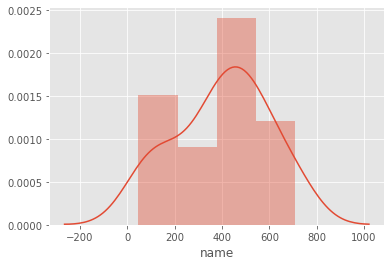

In [27]:
sns.distplot(df_new.groupby('cluster')['name'].count())

Podemos notar que os grupos estão desbalanceados, precisaríamos levar em consideração as regras de negócios, para sabermos se os grupos criados estão adequados com base nas músicas, ritmos entre outros.

Vamos dar uma olhada nos números de outros atributos.

### A popularidade entre os grupos seguem uma distribuição normal.

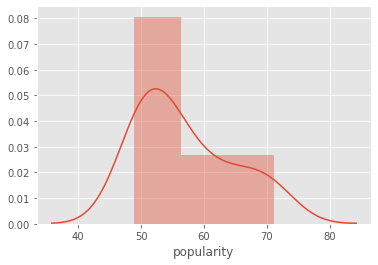

In [28]:
# agrupando por cluster e calculando a média
sns.distplot(df_new.groupby(['cluster'])['popularity'].mean())

In [29]:
df_new.groupby(['cluster'])['popularity'].mean().skew()

0.7931223632486717

In [30]:
df_new.groupby(['cluster'])['popularity'].mean().kurtosis()

-0.7661320783566028

Com os resultados de **skewness** e **kurtosis**, vemos que os dados não obedecem a uma distribuição normal, isso pode ser caracterizado por amostras de diferentes populações.

### Qual é o grupo com mais e menos elementos?

In [31]:
# checando o cluster com mais músicas
pd.DataFrame(df_new.cluster.value_counts()).reset_index()[:1].rename(columns={'index': 'cluster', 'cluster': 'qtd'})

,cluster,qtd
0,6,709


In [32]:
# checando o cluster com menos músicas
pd.DataFrame(df_new.cluster.value_counts()).reset_index()[-1:].rename(columns={'index': 'cluster', 'cluster': 'qtd'})

,cluster,qtd
19,12,46


Vamos dar uma olhada nos dados dos grupos que contém o menor conjunto de elementos.

In [33]:
df_new[df_new.cluster == 12]

,index,name,album,artist,release_date,length,popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,duration_ms,time_signature,genre,url,cluster
7,7,Devil Eyes,Providence,Hippie Sabotage,2016-02-05,131271,80,0,0.702,0.3910,0.396000,0.405,0.3150,0.19900,-8.621,0.1890,99.112,131272,5,['edm'],https://open.spotify.com/track/7MiZjKawmXTsTNe...,12
309,309,Quick Musical Doodles,First Steps,Two Feet,2016-07-29,144000,66,0,0.241,0.6880,0.349000,0.685,0.3740,0.43300,-7.182,0.2700,169.773,144000,4,"['indie poptimism', 'modern rock']",https://open.spotify.com/track/7tZdkPtebOG29Tz...,12
427,427,5:32pm,Vibes 2,The Deli,2016-10-17,136914,72,0,0.686,0.6910,0.186000,0.934,0.0762,0.54800,-13.672,0.0487,86.383,136914,4,"['chillhop', 'lo-fi beats', 'lo-fi house']",https://open.spotify.com/track/7qrBYrivpvfXUPB...,12
789,789,Canto de Ossanha,Os Primeiros Anos,Toquinho,2016-03-18,122760,46,0,0.947,0.4570,0.308000,0.874,0.1080,0.47000,-11.795,0.0491,196.065,122760,4,"['bossa nova', 'mpb', 'samba', 'violao']",https://open.spotify.com/track/5N8wA5SKIlFk2gt...,12
830,830,Só de Tú,Nada Sem Ela,Academia da Berlinda,2016-07-01,240333,45,0,0.765,0.7000,0.659000,0.886,0.3650,0.94100,-8.270,0.0305,122.165,240333,4,"['brazilian indie', 'manguebeat', 'mpb', 'nova...",https://open.spotify.com/track/0Sl8XcWYCcCZs7b...,12
1168,1168,French Inhale,444,[bsd.u],2016-12-02,108078,68,0,0.499,0.8700,0.146000,0.941,0.1050,0.88900,-11.877,0.2200,80.087,108078,4,"['chillhop', 'japanese chillhop', 'lo-fi beats...",https://open.spotify.com/track/4JLI9AgtAXutJvj...,12
1431,1431,You're so Cold,First Steps,Two Feet,2016-07-29,196128,58,0,0.156,0.8940,0.334000,0.782,0.1050,0.34600,-7.852,0.0838,93.025,196128,4,"['indie poptimism', 'modern rock']",https://open.spotify.com/track/6ytwjgwBRxYTUxY...,12
1432,1432,Fear of the Water,Hurt for Me,SYML,2016-09-09,245813,60,0,0.954,0.4750,0.208000,0.883,0.1180,0.15200,-17.635,0.0299,93.029,245813,4,['pop'],https://open.spotify.com/track/3xn7cwof2Srt3CR...,12
1457,1457,Only,Dawn,RY X,2016-05-06,268455,60,0,0.903,0.2930,0.175000,0.528,0.1090,0.08900,-15.543,0.0308,83.182,268456,3,"['indie folk', 'vapor soul']",https://open.spotify.com/track/1hrar0wbUsvgSUp...,12
1486,1486,Jovial,Fresh Squeezed,Limes,2016-11-20,142727,62,0,0.918,0.7640,0.185000,0.926,0.1180,0.37800,-14.408,0.0489,69.972,142728,4,"['indie pop', 'indie poptimism', 'indie rock',...",https://open.spotify.com/track/2COBMrpsGXEagCG...,12


Agora vamos salvar o dataframe com os respectivos grupos e para podemos analisar ou criar outras visualizações, com outros aplicativos como o *Power BI* ou *Tableau*, por exemplo.

Além do dataframe, vamos salvar o nosso modelo com treinado para utilizarmos em outra aplicação.

In [34]:
# # biblioteca que salvam os modelos
# import pickle

# # nome do modelo
# filename = 'model.pkl'

# # persistindo em disco local
# pickle.dump(kmeans, open(filename, 'wb'))

# # fazendo o download do modelo
# model_load = pickle.load(open("model.pkl", "rb"))

# # realizando as predições com o modelo treinado do disco
# model_load.predict(df_scaled.iloc[:, 1:])

In [35]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('grupo_musicas.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_new.to_excel(writer, sheet_name='Sheet1', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

## Conclusão

Criamos um framework para coleta dos dados direto da API do spotify e salvamos os dados em um arquivo *.csv*, fizemos algumas análises e pré-processamento dos dados.<br>
Após criarmos um modelo de **clusterização**, o modelo fez as previsões para os grupos relacionados, colocamos todos em um dataframe e salvamos em um arquivo em excel.<br>
Para os próximos passos, vamos criar uma *POC (Proof of Concept)* com o framework **streamlit** e publicar um dashboard criado com os dados em **Power BI**.

link para dashboard do Power BI: https://bit.ly/3j2KCiU

Há outros tipos de modelos para clusterização, mas utilizamos o KMeans por ser um dos mais utilizados e conseguir ter um bom resultado de forma fácil.

## Referencias

https://developer.spotify.com/dashboard/applications/85bde5058f48488eb76c9a41fd7942eb<br>
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/<br>
https://github.com/plamere/spotipy/tree/master/examples<br>
https://morioh.com/p/31b8a607b2b0<br>
https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b<br>